In [2]:
from torch.utils.data import Dataset
from torch import nn
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
from torchvision import datasets

from pathlib import Path


device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [3]:
# Setup path to a data folder
data_path = Path("./../data")
image_path = data_path / "external"


def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


walk_through_dir(data_path)

There are 4 directories and 0 images in '../data'.
There are 0 directories and 1 images in '../data/raw'.
There are 0 directories and 1 images in '../data/interim'.
There are 0 directories and 1 images in '../data/processed'.
There are 2 directories and 1 images in '../data/external'.
There are 46 directories and 0 images in '../data/external/Train'.
There are 0 directories and 1700 images in '../data/external/Train/character_36_gya'.
There are 0 directories and 1700 images in '../data/external/Train/character_3_ga'.
There are 0 directories and 1700 images in '../data/external/Train/character_2_kha'.
There are 0 directories and 1700 images in '../data/external/Train/character_30_motosaw'.
There are 0 directories and 1700 images in '../data/external/Train/character_13_daa'.
There are 0 directories and 1700 images in '../data/external/Train/digit_6'.
There are 0 directories and 1700 images in '../data/external/Train/character_1_ka'.
There are 0 directories and 1700 images in '../data/ext

In [4]:
train_dir = image_path / "Train"
test_dir = image_path / "Test"

train_dir, test_dir

(PosixPath('../data/external/Train'), PosixPath('../data/external/Test'))

In [5]:


# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
  transforms.Grayscale(num_output_channels=1),
  transforms.RandomRotation(30),
  # Turn the image into a torch.Tensor
  transforms.ToTensor()
])

test_transforms = transforms.Compose([
  transforms.Grayscale(num_output_channels=1),
  transforms.RandomRotation(30),
  # Turn the image into a torch.Tensor
  transforms.ToTensor()
])

train_data_custom = datasets.ImageFolder(root=train_dir,
                                  transform=train_transforms, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data_custom = datasets.ImageFolder(root=test_dir,
                                 transform=test_transforms)


train_data_custom, test_data_custom




(Dataset ImageFolder
     Number of datapoints: 78200
     Root location: ../data/external/Train
     StandardTransform
 Transform: Compose(
                Grayscale(num_output_channels=1)
                RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 13800
     Root location: ../data/external/Test
     StandardTransform
 Transform: Compose(
                Grayscale(num_output_channels=1)
                RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ))

Random image path: ../data/external/Train/character_34_chhya/15090.png
Image class: character_34_chhya
Image height: 32
Image width: 32


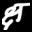

In [6]:
import random
from PIL import Image


# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.png"))

image_path_list
random_image_path = random.choice(image_path_list)

# 2. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


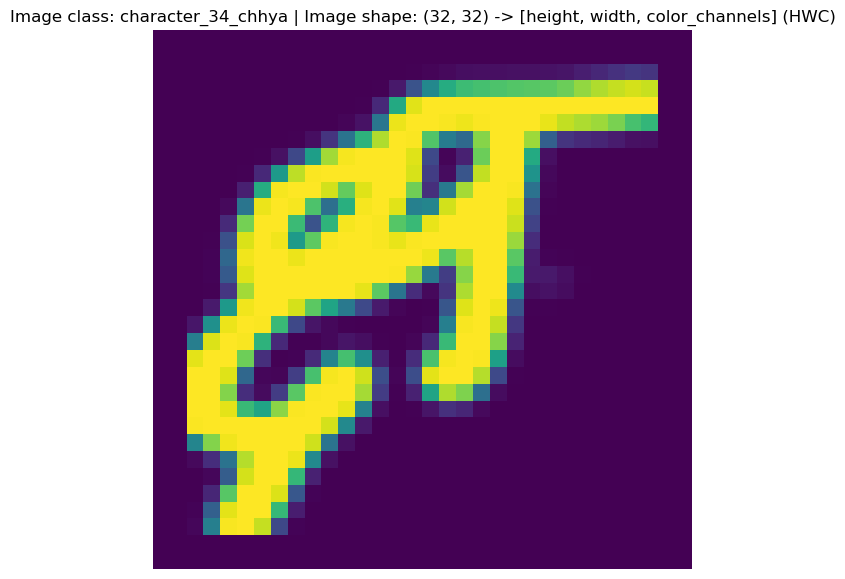

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False);


In [8]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

target_directory = train_dir
find_classes(target_directory)



(['character_10_yna',
  'character_11_taamatar',
  'character_12_thaa',
  'character_13_daa',
  'character_14_dhaa',
  'character_15_adna',
  'character_16_tabala',
  'character_17_tha',
  'character_18_da',
  'character_19_dha',
  'character_1_ka',
  'character_20_na',
  'character_21_pa',
  'character_22_pha',
  'character_23_ba',
  'character_24_bha',
  'character_25_ma',
  'character_26_yaw',
  'character_27_ra',
  'character_28_la',
  'character_29_waw',
  'character_2_kha',
  'character_30_motosaw',
  'character_31_petchiryakha',
  'character_32_patalosaw',
  'character_33_ha',
  'character_34_chhya',
  'character_35_tra',
  'character_36_gya',
  'character_3_ga',
  'character_4_gha',
  'character_5_kna',
  'character_6_cha',
  'character_7_chha',
  'character_8_ja',
  'character_9_jha',
  'digit_0',
  'digit_1',
  'digit_2',
  'digit_3',
  'digit_4',
  'digit_5',
  'digit_6',
  'digit_7',
  'digit_8',
  'digit_9'],
 {'character_10_yna': 0,
  'character_11_taamatar': 1,
  'charac

In [9]:
from torchvision import transforms
train_transforms = transforms.Compose([
  transforms.Grayscale(num_output_channels=1),
  transforms.RandomRotation(30),
  transforms.ToTensor()
])

test_transforms = transforms.Compose([
  transforms.Grayscale(num_output_channels=1),
  transforms.RandomRotation(30),
  # Turn the image into a torch.Tensor
  transforms.ToTensor()
])


train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transforms, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=test_transforms)


train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 78200
     Root location: ../data/external/Train
     StandardTransform
 Transform: Compose(
                Grayscale(num_output_channels=1)
                RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 13800
     Root location: ../data/external/Test
     StandardTransform
 Transform: Compose(
                Grayscale(num_output_channels=1)
                RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ))

In [10]:
len(train_data)


78200

In [11]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

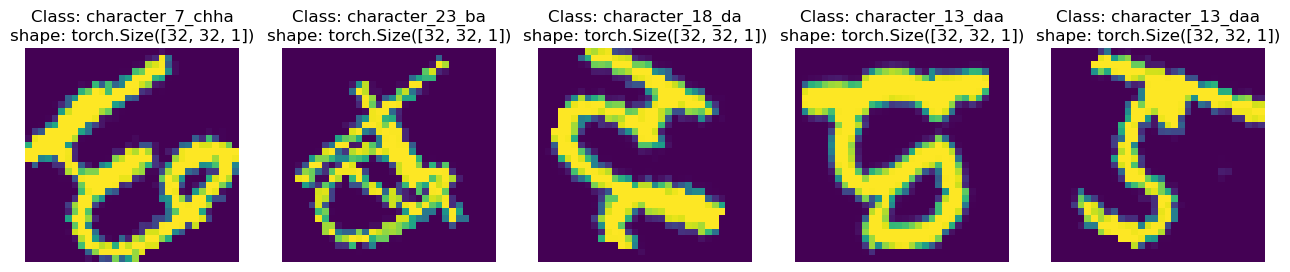

In [12]:
class_names = train_data.classes


# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE = 200
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=True)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x72e914c43260>,
 <torch.utils.data.dataloader.DataLoader at 0x72e913ea38f0>)

In [14]:
if __name__ == '__main__':
    # Get image and label from custom dataloader
    img_custom, label_custom = next(iter(train_dataloader_custom))
    
    # Print out the shapes
    img_custom.shape, label_custom.shape

In [15]:
class Model1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=5,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.LocalResponseNorm(size=2),
        nn.MaxPool2d(kernel_size=2,
                     stride=2), # default stride value is same as kernel_size
        nn.ReLU()
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=5,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.LocalResponseNorm(size=2),
        nn.MaxPool2d(kernel_size=2,
                     stride=2), # default stride value is same as
        nn.ReLU()
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=5,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Dropout()
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*5*5,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

class Model2(nn.Module):

  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=5,
                  stride=1,
                  padding=0),
        
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=5,
                  stride=1,
                  padding=0),
        
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*5*5,
                  out_features=middle_shape),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=middle_shape,
                 out_features=output_shape)
    )
    
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

In [16]:

model = Model1(input_shape=1, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model

Model1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): LocalResponseNorm(2, alpha=0.0001, beta=0.75, k=1.0)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): ReLU()
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): LocalResponseNorm(2, alpha=0.0001, beta=0.75, k=1.0)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): ReLU()
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=250, out_features=46, bias=True)
  )
)

In [17]:
image_batch, label_batch = next(iter(train_dataloader_custom))
image_batch.shape, label_batch.shape

(torch.Size([200, 1, 32, 32]), torch.Size([200]))

In [18]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model, input_size=[1, 1, 32, 32])

Layer (type:depth-idx)                   Output Shape              Param #
Model1                                   [1, 46]                   2,510
├─Sequential: 1-1                        [1, 10, 14, 14]           --
│    └─Conv2d: 2-1                       [1, 10, 28, 28]           260
│    └─ReLU: 2-2                         [1, 10, 28, 28]           --
│    └─LocalResponseNorm: 2-3            [1, 10, 28, 28]           --
│    └─MaxPool2d: 2-4                    [1, 10, 14, 14]           --
│    └─ReLU: 2-5                         [1, 10, 14, 14]           --
├─Sequential: 1-2                        [1, 10, 5, 5]             --
│    └─Conv2d: 2-6                       [1, 10, 10, 10]           2,510
│    └─ReLU: 2-7                         [1, 10, 10, 10]           --
│    └─LocalResponseNorm: 2-8            [1, 10, 10, 10]           --
│    └─MaxPool2d: 2-9                    [1, 10, 5, 5]             --
│    └─ReLU: 2-10                        [1, 10, 5, 5]             --
├─Sequen

In [19]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [20]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [21]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

In [22]:
NUM_EPOCHS = 150

# Recreate an instance of TinyVGG
model_1 = Model1(input_shape=1, # number of color channels of our target images
                  hidden_units=50,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(params=model_1.parameters(),
#                             lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(params=model_1.parameters(),
                              lr=0.001)
# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_custom,
                        test_dataloader=test_dataloader_custom,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/150 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.2215 | Train acc: 0.6691 | Test loss: 0.5903 | Test acc: 0.8294
Epoch: 1 | Train loss: 0.4908 | Train acc: 0.8598 | Test loss: 0.3940 | Test acc: 0.8893
Epoch: 2 | Train loss: 0.3548 | Train acc: 0.8974 | Test loss: 0.3107 | Test acc: 0.9114
Epoch: 3 | Train loss: 0.2879 | Train acc: 0.9158 | Test loss: 0.2701 | Test acc: 0.9214
Epoch: 4 | Train loss: 0.2424 | Train acc: 0.9273 | Test loss: 0.2415 | Test acc: 0.9299
Epoch: 5 | Train loss: 0.2110 | Train acc: 0.9376 | Test loss: 0.2096 | Test acc: 0.9377
Epoch: 6 | Train loss: 0.1894 | Train acc: 0.9426 | Test loss: 0.1906 | Test acc: 0.9428
Epoch: 7 | Train loss: 0.1744 | Train acc: 0.9476 | Test loss: 0.1991 | Test acc: 0.9421
Epoch: 8 | Train loss: 0.1616 | Train acc: 0.9512 | Test loss: 0.1838 | Test acc: 0.9451
Epoch: 9 | Train loss: 0.1498 | Train acc: 0.9543 | Test loss: 0.1727 | Test acc: 0.9472
Epoch: 10 | Train loss: 0.1451 | Train acc: 0.9560 | Test loss: 0.1694 | Test acc: 0.9505
Epoch: 11 | Train lo

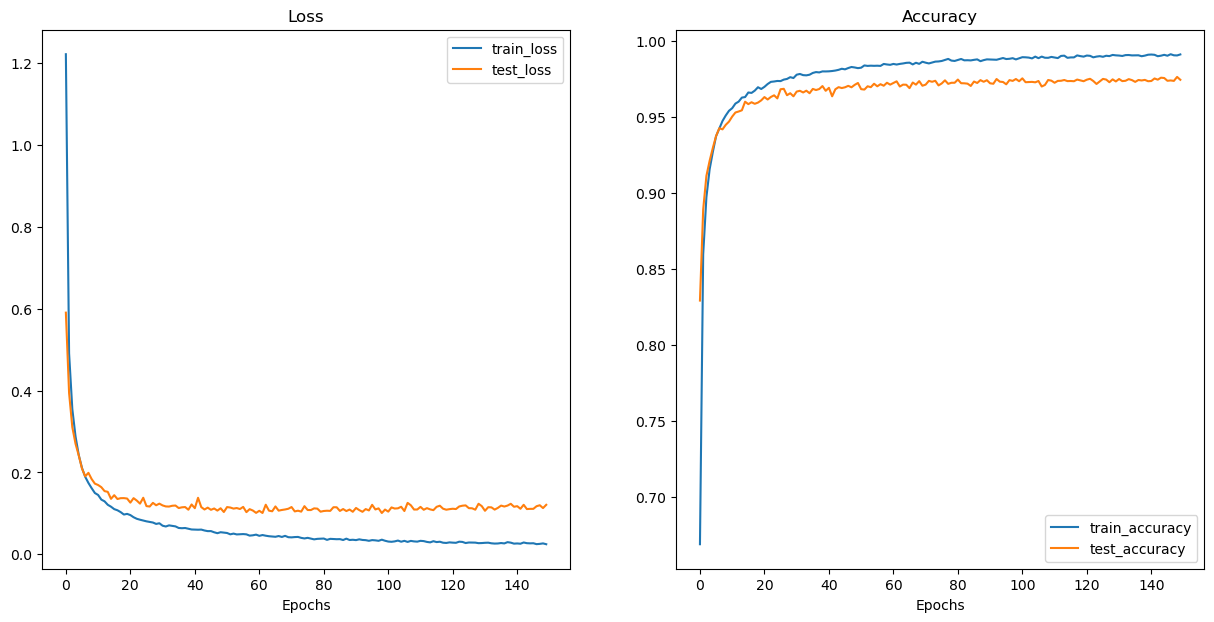

In [23]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


plot_loss_curves(model_1_results)
